In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [13]:
from google.colab import files
uploaded = files.upload()



Saving data.csv to data (1).csv


In [14]:
data = pd.read_csv("data.csv")

In [18]:
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)
if 'Unnamed: 32' in data.columns:
    data.drop('Unnamed: 32', axis=1, inplace=True)

In [19]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [20]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.9974


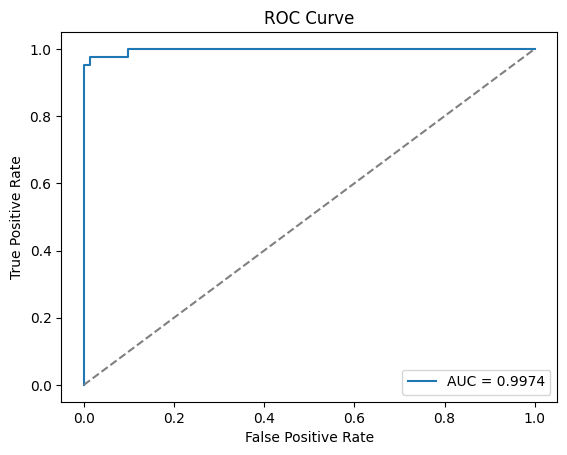

In [10]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc_score:.4f}")

# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("roc_curve.png")
plt.show()



Confusion Matrix with threshold=0.4:
 [[70  1]
 [ 1 42]]


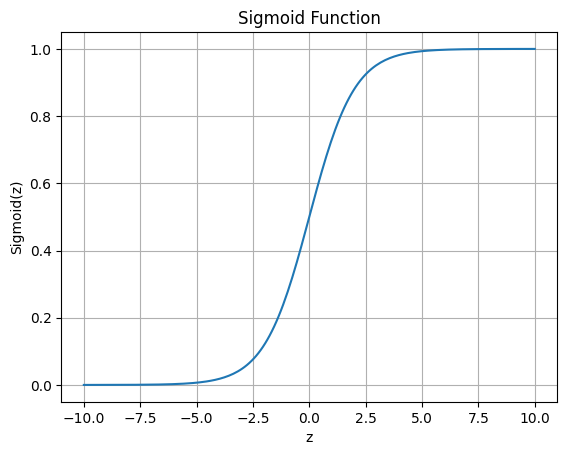

In [11]:
threshold = 0.4  # example threshold
y_pred_new = (y_prob >= threshold).astype(int)
cm_new = confusion_matrix(y_test, y_pred_new)
print(f"\nConfusion Matrix with threshold={threshold}:\n", cm_new)

# Step 7: Sigmoid Function Example
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Plot Sigmoid Curve
z = np.linspace(-10, 10, 200)
sig = sigmoid(z)
plt.plot(z, sig)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.savefig("sigmoid_curve.png")
plt.show()
